# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [23]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 設定 data_path
dir_data = 'D:\data\Part01'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [7]:
app_train.DAYS_BIRTH

0          9461
1         16765
2         19046
3         19005
4         19932
5         16941
6         13778
7         18850
8         20099
9         14469
10        10197
11        20417
12        13439
13        14086
14        14583
15         8728
16        12931
17         9776
18        17718
19        11348
20        18252
21        14815
22        11146
23        24827
24        11286
25        19334
26        18724
27        15948
28         9994
29        10341
          ...  
307481    20644
307482    14106
307483    24911
307484    12847
307485    11973
307486    16010
307487    23125
307488    10092
307489    16471
307490     9874
307491    10976
307492    20965
307493    17533
307494    14958
307495    20922
307496    17345
307497    16679
307498    19102
307499    16988
307500    20390
307501    12961
307502    16063
307503    11870
307504    16705
307505    24384
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length

In [20]:
#將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
app_train['Age'] = round(app_train['DAYS_BIRTH']/365)

#將年齡分為10歲年齡組
bin_cut =  5
group_names = ['20-30', '30-40', '40-50', '50-60', '60-70']
app_train['Age_group'] = pd.cut(app_train['Age'], bins = bin_cut, labels=group_names).reset_index(drop=True)


In [19]:
app_train['Age_group'].value_counts()

(30.6, 40.2]      82770
(40.2, 49.8]      68813
(49.8, 59.4]      68039
(20.952, 30.6]    48869
(59.4, 69.0]      39020
Name: Age_group, dtype: int64

In [41]:
df = app_train.groupby(["TARGET", "Age_group"])['Age_group'].count().reset_index(name='count'); df

,TARGET,Age_group,count
0,0,20-30,43276
1,0,30-40,74961
2,0,40-50,63552
3,0,50-60,63810
4,0,60-70,37087
5,1,20-30,5593
6,1,30-40,7809
7,1,40-50,5261
8,1,50-60,4229
9,1,60-70,1933


In [34]:
list(df[df['TARGET'] == 0]['Age_group'])

['20-30', '30-40', '40-50', '50-60', '60-70']

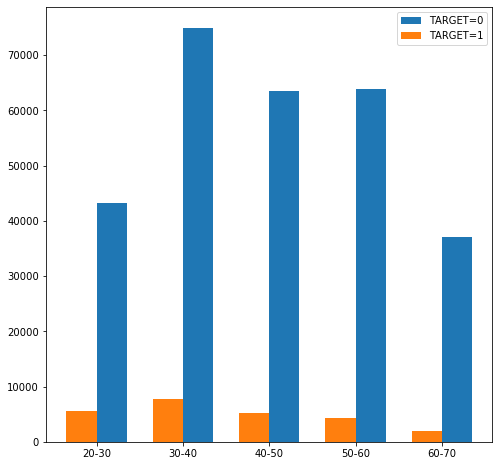

In [40]:
#繪製 TARGET與 Age_group 的長條圖
plt.figure(figsize = (8, 8))

# Age_group以為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
x1 = list(df[df['TARGET'] == 0]['Age_group'])
y1 = list(df[df['TARGET'] == 0]['count'])
y2 = list(df[df['TARGET'] == 1]['count'])

# 繪製分組長條圖稍微調整數據以達到效果
plt.bar(x1, y1, label = 'TARGET=0', align = "edge", width = 0.35)
plt.bar(x1, y2, label = 'TARGET=1', align = "edge", width = -0.35)
plt.legend()
plt.show()